# Welcome to ORIE 3120 Recitation 5!
This recitation, we'll familiarize ourselves with Python and dive into some interesting data analysis using Python libraries.

The easiest way to do this recitation is in Google colab:
- Download this .ipynb file from the course website ("ipynb" stands for "interactive python notebook")
- Go to https://colab.research.google.com/
- Log in with any google account (it can be your Cornell google account, or a personal account)
- Click "File -> Upload Notebook" and upload the ipynb file
- Also download the CSV file that this recitation uses, "diabetic_data_orie3120_rec5.csv", and upload it to Google colab by clicking on the folder icon on the left side of your screen. This opens a sidebar and you can upload the file by clicking on the upload icon. It will take up to a minute for the file to upload.
- Do the recitation, entering your answers after each question (the questions are marked by **Q:**)
- Google saves your progress as you go, but to be sure it has the latest changes you can always click "File -> Save"
- When you are done, download the notebook file with your answers using "File -> Download .ipynb"

When you are done with the recitation, upload your .ipynb file with completed answers to Gradescope.


This is a markdown cell. Try double clicking on this cell to correct the typo in this sentence:

"ORIE 3120 teaches practical tools for operations research, data science, and machine learning."

The next cell will import the packages we need. Run it with ctrl-enter (PC) or cmd-enter (mac).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Let's practice assigning values to variables. We've assigned `a` to have the value 4. 

**Q1:** Assign `b` to have the value 17 by double-clicking and editing the cell below.

In [2]:
a = 4
b = 17

Unlike Java, Python is dynamically typed which means at declaration, there is no requirement to specify a data type. Furthermore, we can change a variable name from one type to another without any error. 

The following cell contains variables of the string types.

**Q2:** Concatentate the two strings below with the "+" operator and print the cell to confirm that it works


In [3]:
s1 = "foo"
s2 = "bar"
print(s1+s2)

foobar


This allows the user more flexibity but increased responsibility of maintaining type invariants so that thier program doesn't crash. For example, Python will not accept a string being concatenated with a integer or float.

**Q3:** Before running the cell, what do you think the following will print? Will any of these throw an error?

In [4]:
print("Print statement 1: " + '2' + '2')
print("Print statement 2: " ,  2  +  2 ) 
print("Print statement 3: " , 2 +  '2' ) #error

Print statement 1: 22
Print statement 2:  4


TypeError: unsupported operand type(s) for +: 'int' and 'str'

Another core data structure is a list. There are many ways to create a list. Below are a couple of the ways of creating a list. Detailed below are two key functions when operating with lists: 

"len(someList)" will return the number of elements in that list.

"someList.append(x)" will add the value located in the variable x to the end of someList.

**Q4:** Create your own list that includes all integers from 7 to 20 (inclusive) using the range function


In [8]:
# These all create the same list
lst1 = [0,1,2,3,4]    
lst2 = list(range(5))
lst3 = list(range(0,5))
lst3 = list(range(0,5,1))   
# range(start, end, incremental) 
# NOTE: range does not include the end number
# Also pass your variable into the list() function to convert to a list

### Your code
yourList = list(range(7,21,1)) #?? - replace the []
###
print("Does your list correctly answer the question? ", yourList == [7,8,9,10,11,12,13,14,15,16,17,18,19,20])

Does your list correctly answer the question?  True


Indexing in Python starts at 0 and is very convenient. You can also index backwards from the end of the list with negative numbers as shown below.

**Q5:** Print the product of the 1st element, the fifth element, and the last element from `yourList`.  

In [10]:
print(yourList[0]) # Accessing the first element
print(yourList[1]) # Accessing the second element
print(yourList[-1]) # Accessing the last element
print(yourList[-2]) # Accessing the second to last element
print(yourList[4])

### your code
print(yourList[0]*yourList[4]*yourList[-1])
###

7
8
20
19
11
1540


We can easily iterate through lists and manipulate their contents. 
We can also segment code into functions that are easy to reuse.

Below we define a function `factNumber` that takes in a positive number $n$ and returns its factorial $n!$. For example, 1! = 1 and 3! = 6.

**Q6:** Below is a for loop that will iterate over `yourList`. Can you find the sum of the factorials of the numbers in `yourList`?

In [11]:
def factNumber(x):
  factorialList = [1,1]
  i = 2
  while(len(factorialList) - 1< x):
    factorialList.append(factorialList[-1]*i)
    i = i+1
  return factorialList[-1]

aggregateSum = 0
for x in yourList:
  ### Your code
  # Remember to call the function factNumber(someValue)
    aggregateSum += factNumber(x)
  ###

# This should print 2561327494111819440
print(aggregateSum)

2561327494111819440


**Q7:** Now define your own function using the code above that takes in a list containing positive entries and returns the sum of their factorials.

In [12]:
### your code
def yourFunc(someList):
  ### Input should be array, dataset of random numbers
    someVal = 0
    for x in yourList:
        someVal += factNumber(x)
    
    return someVal # Make sure to change someVal
###

# Calling it should print the same as above
print(yourFunc(yourList))

2561327494111819440


# Data Analysis

Now suppose we are consulting with Cayuga Medical Center, a local hospital. They would like us to help them better understand the length of stay for diabetic patients. This information will allow them to plan beds availabilities more efficiently. 

Import the dataset `diabetic_data.csv` using `pandas`.
Look at the data. 

**Q8:** What type is the data in each column?

In [14]:
# your code to import data here. 
df = pd.read_csv('diabetic_data.csv')
# Hint: use the pd.read_csv function from lecture
# check data types. Hint: use dtypes
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Each day 20 patients arrive at our hospital. We'll call that group of 20 patients a **cohort**. We are interested in the duration of hospital stays for cohorts so that we can ensure we have enough beds. The field time_in_hospital contains the length of each patient's hospital stay expressed as a number of days.

**Q9:** Take a random sample of 20 entries from the time_in_hospital field from your dataframe, without replacement. Try running this command 3 times to see that the cohort is different every time. 

Hint: Pandas series have a sample method that randomly selects a desired number of entries without replacement: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [31]:
# select 20 random entries from the time_in_hospital field in your dataframe
random = df.sample(20)
# your code here
random['time_in_hospital']

3967      5
40634     4
31008     6
35        2
83421     6
97636     3
84554     4
80619     2
72048     2
35286     2
83741    11
55371     2
77608    11
21161     7
38185     2
49686     8
83442     4
97744     4
5164      2
22350     5
Name: time_in_hospital, dtype: int64

**Q10:** Write a function to compute the total time a list of patients will spend in the hospital. The input should be a Pandas series specifying time spent in hospital for a collection of patients, and the output should be the sum of the time spent in the hospital by those patients.

Hint: Pandas series have a sum() method. If you use this, your function can be very short. The sum() method is explained here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html



In [36]:
#your code here
def totalTimeInHospital(timeSeries):
    return(sum(timeSeries))

**Q11:** Apply your function to three randomly chosen lists of 20 patients to see that the total time is different on each cohort.

In [37]:
#your code here
print(totalTimeInHospital(df.sample(20)['time_in_hospital']))
print(totalTimeInHospital(df.sample(20)['time_in_hospital']))
print(totalTimeInHospital(df.sample(20)['time_in_hospital']))

102
89
78


**Q12:** Compute the duration of 100 random samples and collect these in the list `durations`. Plot the resulting distribution with `plt.hist()`. 

Hint: you can add entries to a list using append method, as in the example code earlier in this recitation. Alternatively, it is a little bit faster to create a list with room for 100 entries that is initially filled with 0's with the command

```
durations = [0]*100
```

(array([ 5.,  5., 20., 19., 16., 19.,  7.,  7.,  0.,  2.]),
 array([ 56. ,  63.4,  70.8,  78.2,  85.6,  93. , 100.4, 107.8, 115.2,
        122.6, 130. ]),
 <a list of 10 Patch objects>)

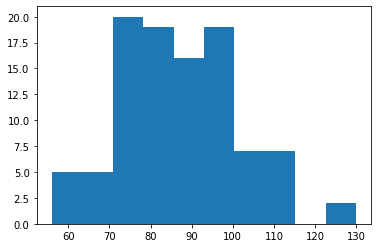

In [45]:
durations = [0] * 100
for i in range(0,100):
    durations[i] = totalTimeInHospital(df.sample(20)['time_in_hospital'])
plt.hist(durations)

**Q13:** What is the mean duration among these samples? What is the standard deviation of these samples?

Hint: you can compute the mean of a list using np.mean() and the standard deviation using np.std(), as described in https://numpy.org/doc/stable/reference/generated/numpy.mean.html and https://numpy.org/doc/stable/reference/generated/numpy.std.html


In [46]:
#your code here
print(np.mean(durations))
print(np.std(durations))

87.12
13.975893531363209


**Q14:** 

a) What is the expected duration of stay for one patient drawn at random from our original dataset with ? Hint: pandas Series' have a mean() method that may be useful here.

b) We can multiply our value in part (a) by 20 to get the expected duration of stay for a cohort of 20 people. We will call this the **true mean duration** of stay for a cohort. Calculate the true mean for a cohort. 

c) You should see that the middle of the histogram of `durations` you plotted and described in the previous two questions is close to the value that you computed in part (b). Why do you think this is?

In [56]:
# your code and explanation here
mean = df['time_in_hospital'].mean()
print("a) Mean duration of one patient drawn at random", mean)
print("b) True mean duration of one cohort drawn at random", mean*20)
print("c) The true mean duration should be very close to the mean calculated using the random samples as the values are being taken from the same data set")
      

a) Mean duration of one patient drawn at random 4.395986871843248
b) True mean duration of one cohort drawn at random 87.91973743686496
c) The true mean duration should be very close to the mean calculated using the random samples as the values are being taken from the same data set


We can compute a confidence interval for the true mean duration based on the entries in `duration`. We do this by thinking of the entries in `duration` as independent and identically distributed samples from a probability distribution whose mean is the true mean duration. To calculate a 95\% confidence interval, we take the mean of the entries in the `duration` (called the "empirical mean") and add / subtract 1.96 times their standard deviation divided by the square root of the number of entries in `duration`.

Hint: to take square roots, use np.sqrt()

**Q15:** Compute this confidence interval. Was the true mean in the confidence interval?

In [62]:
# your code and explanation here
print("(",np.mean(durations) - (1.96*np.std(durations)) / np.sqrt(len(durations)), ",", 
      np.mean(durations) + (1.96*np.std(durations)) / np.sqrt(len(durations)), ")")
print("Yes, the true mean is included in the confidence interval")

( 84.38072486785282 , 89.85927513214719 )
Yes, the true mean is included in the confidence interval


**Q16:** Create a list of `durations`, but now drawing 1000 random cohorts instead of 100. How does the empirical mean of the entries in this new bigger list compare to the true mean duration now?

87.689
The empirical mean of the entries in this new bigger list is closer to the true mean duration by about 50%


(array([ 15.,  69., 166., 238., 192., 173.,  93.,  41.,   9.,   4.]),
 array([ 55. ,  62.8,  70.6,  78.4,  86.2,  94. , 101.8, 109.6, 117.4,
        125.2, 133. ]),
 <a list of 10 Patch objects>)

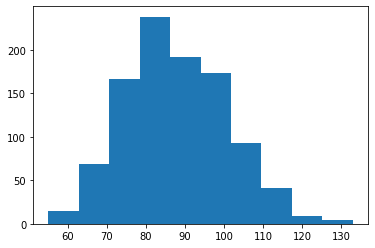

In [66]:
# 1000 samples
durations = [0] * 1000
# your code here
for i in range(0,1000):
    durations[i] = totalTimeInHospital(df.sample(20)['time_in_hospital'])
print(np.mean(np.mean(durations)))
print("The empirical mean of the entries in this new bigger list is closer to the true mean duration by about 50%")
plt.hist(durations)

**Q17:** What is the shape of this histogram? Why is the shape different than the histogram of 100 durations above? How do you expect this to look if you sampled 10000 durations, or 100000? (Hint: recall the central limit theorem.)

Your explanation here

The shape of the histogram is more of a proper normal distribution than the histogram of 100 durations. I would expect the distribution to look even more 'normal' if I increased the size of the sample